In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
#open dataset and add paths to array
import pathlib
paths =[]
for path in pathlib.Path("Dataset\mask_weared_incorrect").iterdir():
    #print(path)
    paths.append(path)
for path in pathlib.Path("Dataset\with_mask").iterdir():
    #print(path)
    paths.append(path)
for path in pathlib.Path("Dataset\without_mask").iterdir():
    #print(path)
    paths.append(path)

#check length of paths array to see if all data was copied(8982 files)    
print(len(paths))

8982


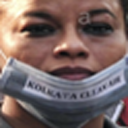

In [3]:
#incorrect_mask = list(paths.glob('mask_weared_incorrect/*'))
PIL.Image.open(paths[0])

In [4]:
#define parameters for the loader
batch_size = 32
img_height = 128
img_width = 128
directory = "Dataset/"

In [5]:
#create training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8982 files belonging to 3 classes.
Using 7186 files for training.


In [6]:
#create test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8982 files belonging to 3 classes.
Using 1796 files for validation.


In [7]:
#print the class name
class_names = train_dataset.class_names
print(class_names)

['mask_weared_incorrect', 'with_mask', 'without_mask']


In [8]:
#configure for better preformance
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
#Standardize the images ideal to neural network
rescale_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [10]:
#create the model
number_classes = 3

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(number_classes)
])

In [11]:
#compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0

In [13]:
#train the model
epochs=10
history = model.fit(
  train_dataset,
  validation_data=test_dataset,
  epochs=epochs
)

Epoch 1/10
225/225 [==============================] - 44s 179ms/step - loss: 0.3494 - accuracy: 0.8579 - val_loss: 0.1909 - val_accuracy: 0.9271
Epoch 2/10
225/225 [==============================] - 39s 174ms/step - loss: 0.1349 - accuracy: 0.9517 - val_loss: 0.1435 - val_accuracy: 0.9482
Epoch 3/10
225/225 [==============================] - 37s 165ms/step - loss: 0.0915 - accuracy: 0.9698 - val_loss: 0.0941 - val_accuracy: 0.9649
Epoch 4/10
225/225 [==============================] - 36s 162ms/step - loss: 0.0565 - accuracy: 0.9797 - val_loss: 0.0767 - val_accuracy: 0.9738
Epoch 5/10
225/225 [==============================] - 37s 166ms/step - loss: 0.0292 - accuracy: 0.9911 - val_loss: 0.0747 - val_accuracy: 0.9766
Epoch 6/10
225/225 [==============================] - 38s 167ms/step - loss: 0.0152 - accuracy: 0.9949 - val_loss: 0.0811 - val_accuracy: 0.9749
Epoch 7/10
225/225 [==============================] - 39s 172ms/step - loss: 0.0222 - accuracy: 0.9915 - val_loss: 0.1161 - val_ac

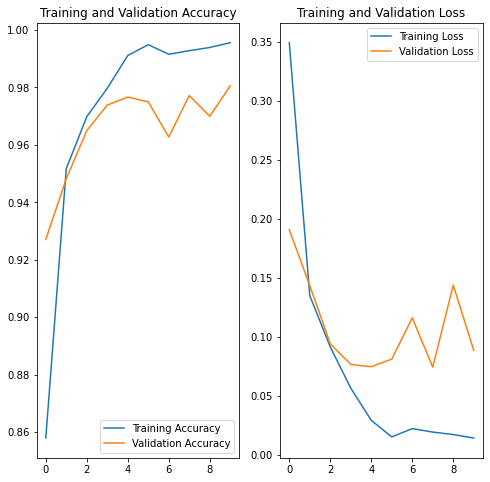

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

This image most likely belongs to with_mask with a 99.99 percent confidence.


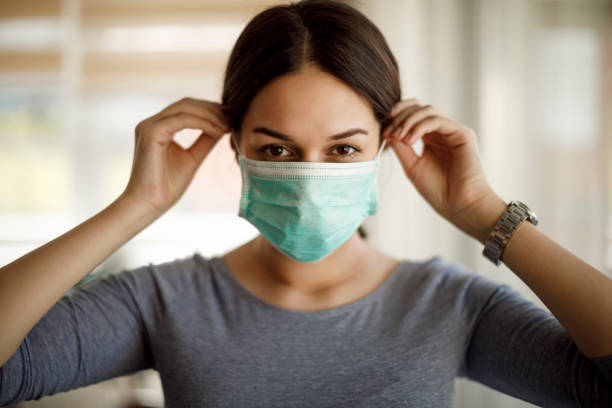

In [15]:
test_image = "sample\sample1.jpg"

img = keras.preprocessing.image.load_img(
    test_image, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
PIL.Image.open(test_image)

This image most likely belongs to mask_weared_incorrect with a 99.95 percent confidence.


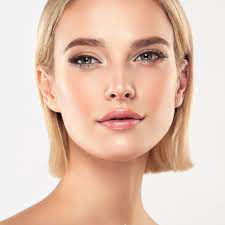

In [16]:
test_image2 = "sample\sample2.jpg"

img = keras.preprocessing.image.load_img(
    test_image2, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
PIL.Image.open(test_image2)

This image most likely belongs to with_mask with a 100.00 percent confidence.


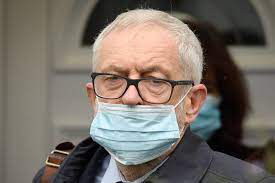

In [17]:
test_image3 = "sample\sample3.jpg"

img = keras.preprocessing.image.load_img(
    test_image3, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
PIL.Image.open(test_image3)